In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [4]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [5]:
data_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [6]:
sliced_data_baseline = data_baseline.where((-25 < data_baseline.nav_lon) & (data_baseline.nav_lon < 10) & (35 < data_baseline.nav_lat) & (data_baseline.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_baseline_plot = sliced_data_baseline.ALK.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.ALK.mean(dim=('y', 'x'))

In [8]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

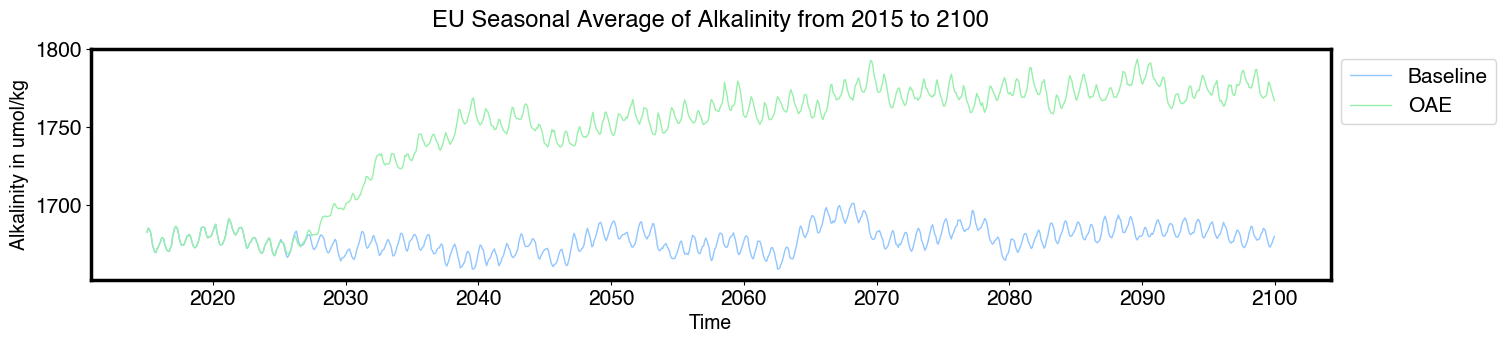

In [9]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ALK, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ALK, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of Alkalinity from 2015 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [10]:
sliced_frame_baseline_plot = sliced_frame_baseline.ALK.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.ALK.mean(dim=('y', 'x'))

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

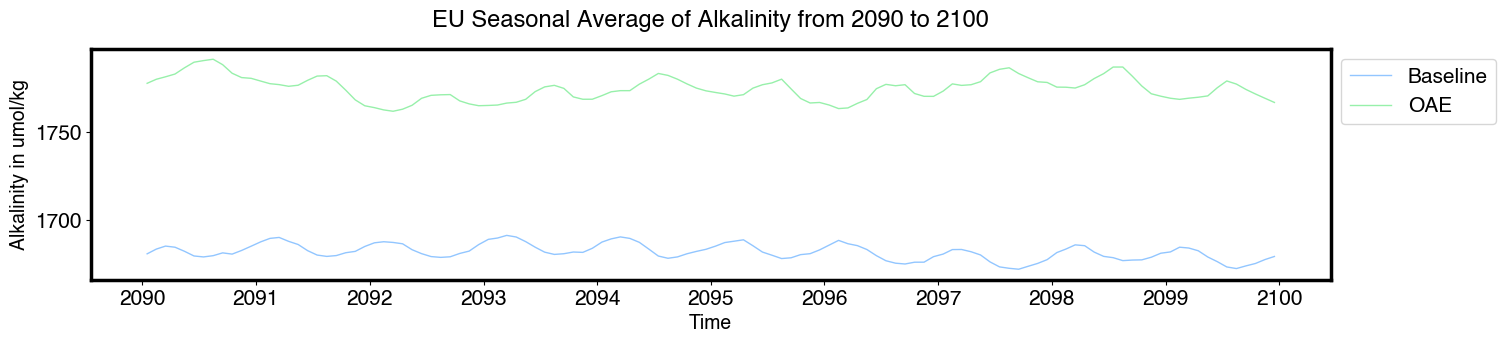

In [12]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of Alkalinity from 2090 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [13]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_baseline = sliced_data_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [14]:
alk_season_summary_baseline = alk_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_baseline = alk_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
alk_seasonal_mean_baseline = alk_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_oae = sliced_data_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [16]:
alk_season_summary_oae = alk_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_oae = alk_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
alk_seasonal_mean_oae = alk_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


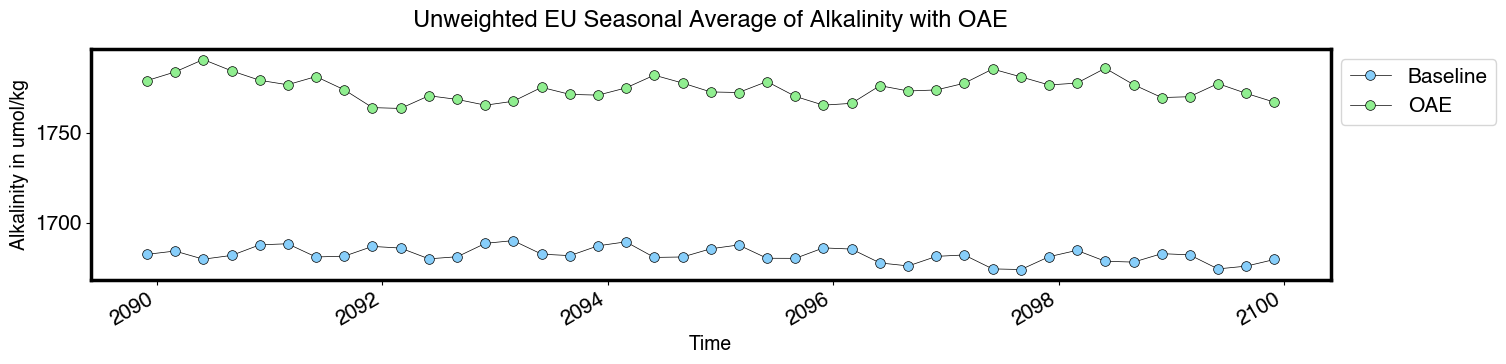

In [17]:
f, ax = plt.subplots(figsize=(16, 3))

alk_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [18]:
month_length_baseline = alk_baseline.time_counter.dt.days_in_month
alk_weighted_mean_baseline = ((alk_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_baseline = alk_weighted_mean_baseline.where(alk_weighted_mean_baseline)
alk_weighted_season_baseline = alk_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [19]:
month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_mean_oae = ((alk_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_oae = alk_weighted_mean_oae.where(alk_weighted_mean_oae)
alk_weighted_season_oae = alk_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

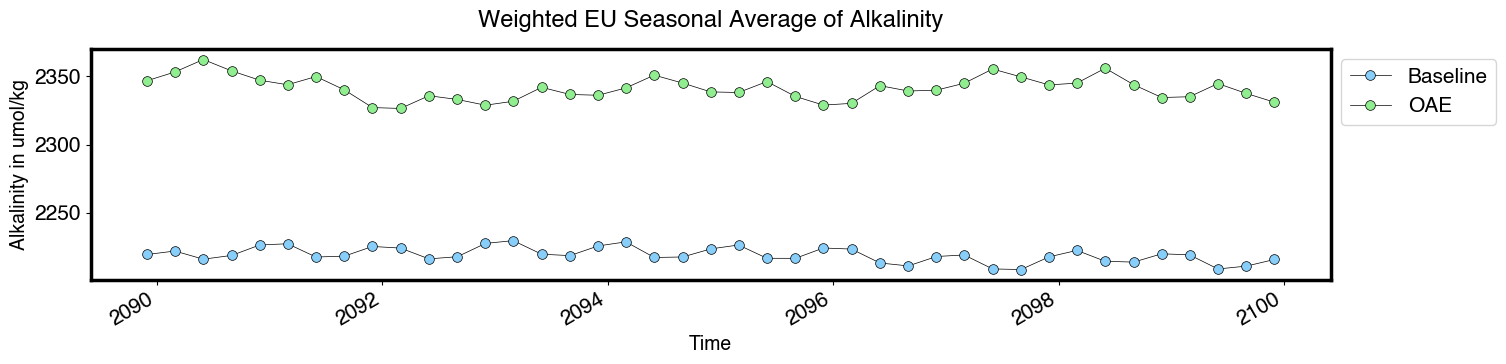

In [20]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
alk_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

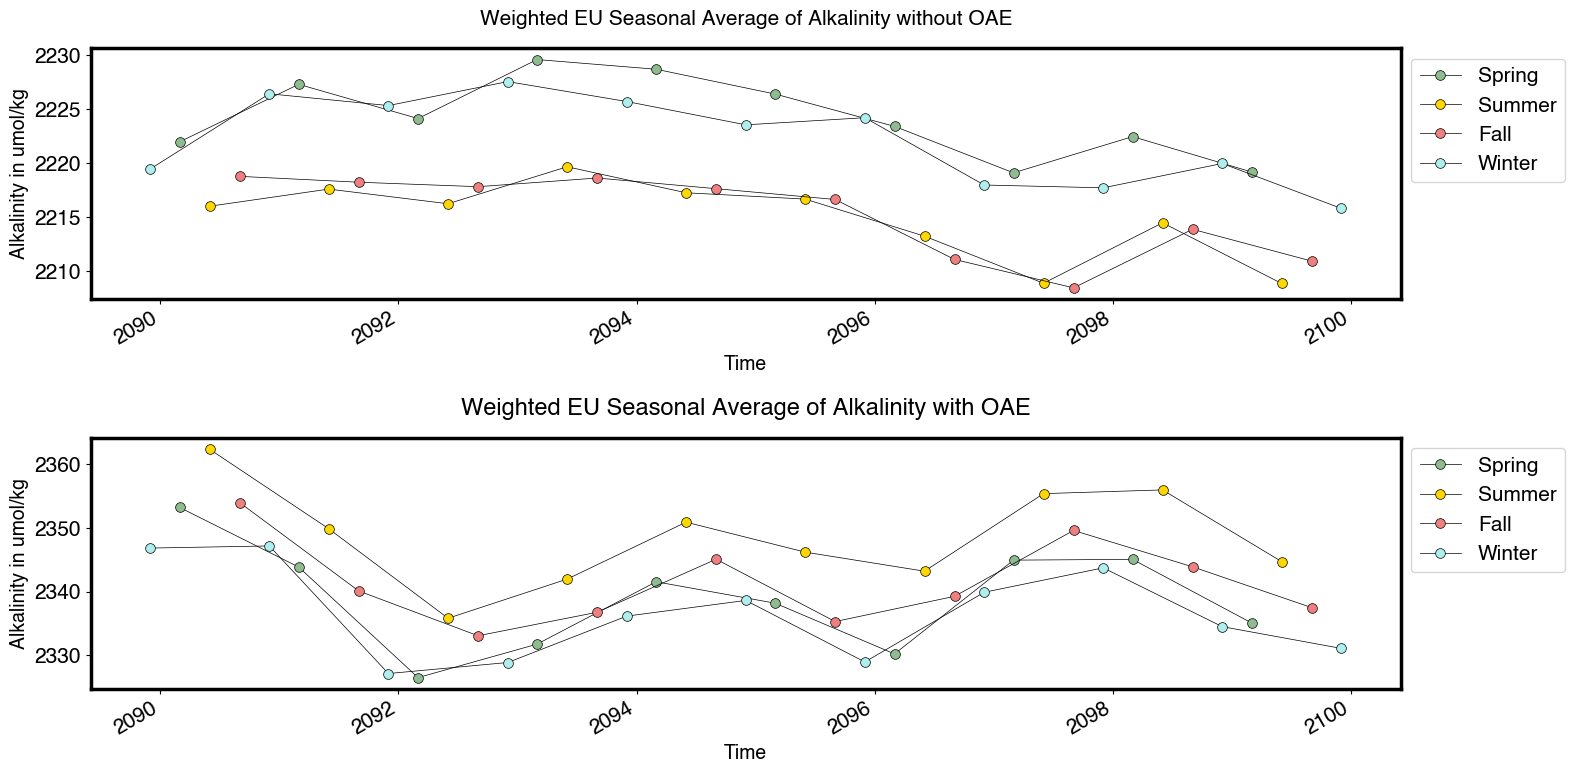

In [21]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in alk_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity in umol/kg', fontsize=14)

for month, arr in alk_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity in umol/kg', fontsize=14)
f.tight_layout()
plt.show()

In [22]:
alk_weighted_baseline = alk_weighted_season_baseline.to_dataframe('ALK_Flux')
alk_weighted_baseline = alk_weighted_baseline.droplevel(1, axis=0)
alk_weighted_baseline['Month'] = pd.DatetimeIndex(alk_weighted_baseline.index).month

In [23]:
conditions = [
    (alk_weighted_baseline['Month'] == 3),
    (alk_weighted_baseline['Month'] == 6),
    (alk_weighted_baseline['Month'] == 9),
    (alk_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_baseline['Month'] = np.select(conditions, values)

In [24]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of Alkalinity without OAE')

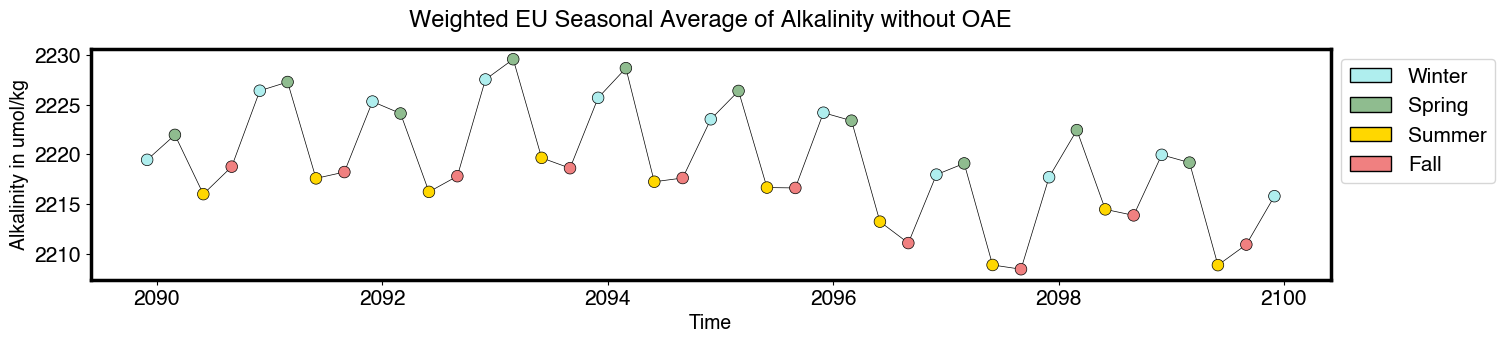

In [25]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

In [26]:
alk_weighted_oae = alk_weighted_season_oae.to_dataframe('ALK_Flux')
alk_weighted_oae = alk_weighted_oae.droplevel(1, axis=0)
alk_weighted_oae['Month'] = pd.DatetimeIndex(alk_weighted_oae.index).month

In [27]:
conditions = [
    (alk_weighted_oae['Month'] == 3),
    (alk_weighted_oae['Month'] == 6),
    (alk_weighted_oae['Month'] == 9),
    (alk_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_oae['Month'] = np.select(conditions, values)

In [28]:
colors = dict(zip(alk_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of Alkalinity with OAE')

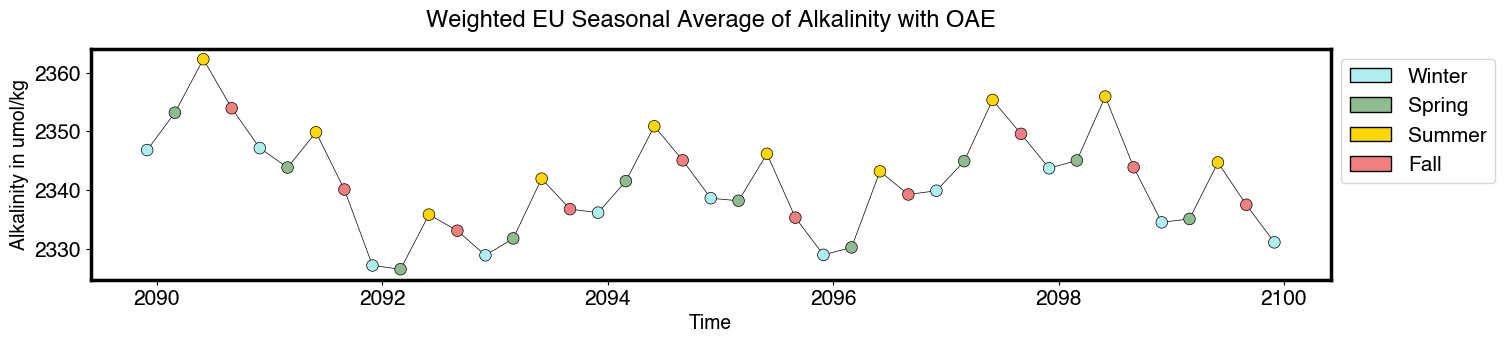

In [29]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, color=alk_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

Text(0.5, 1.06, 'Weighted EU Seasonal Average of Alkalinity')

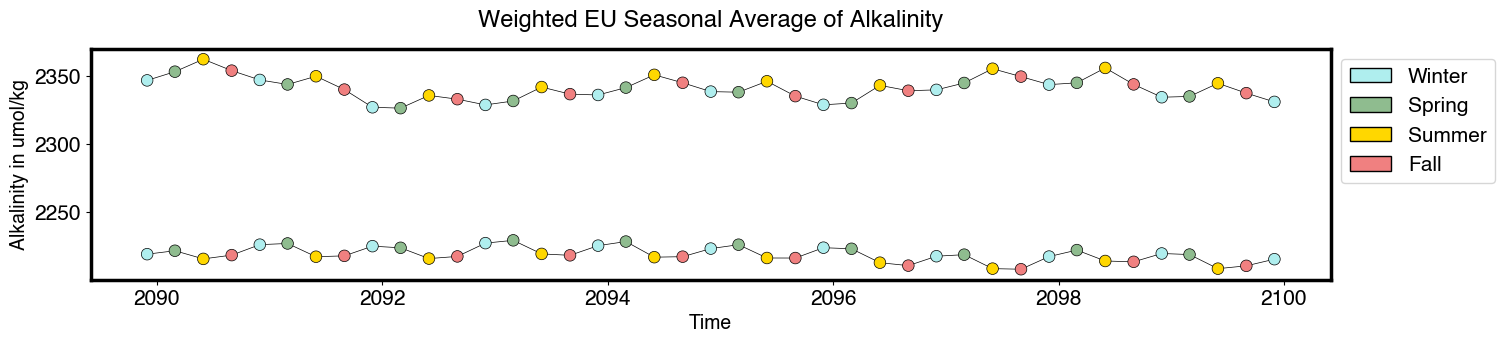

In [30]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, color=alk_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

In [31]:
mean_baseline = (sliced_frame_baseline.ALK.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.droplevel(1, axis=0)
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ALK.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter']= mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [32]:
mean_oae = (sliced_frame_oae.ALK.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.droplevel(1, axis=0)
mean_oae = mean_oae.groupby(mean_oae.index.month).ALK.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

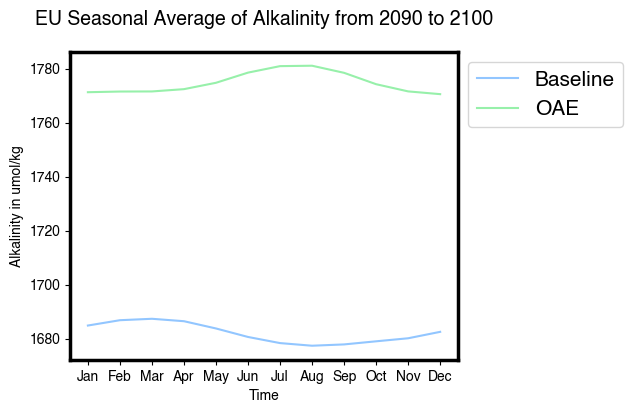

In [33]:
plt.figure(figsize=(5,4))
plt.plot(mean_baseline.ALK, label='Baseline')
plt.plot(mean_oae.ALK, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel("Time", fontsize=10)
plt.ylabel("Alkalinity in umol/kg", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of Alkalinity from 2090 to 2100', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

In [34]:
sliced_frame_baseline = sliced_frame_baseline.ALK.mean(dim=('deptht'))

In [35]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [36]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [37]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='ALK')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='ALK')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='ALK')

Text(0.5, 1.03, 'EU Seasonal Average of Alkalinity in umol/kg from 2090 to 2100 without OAE')

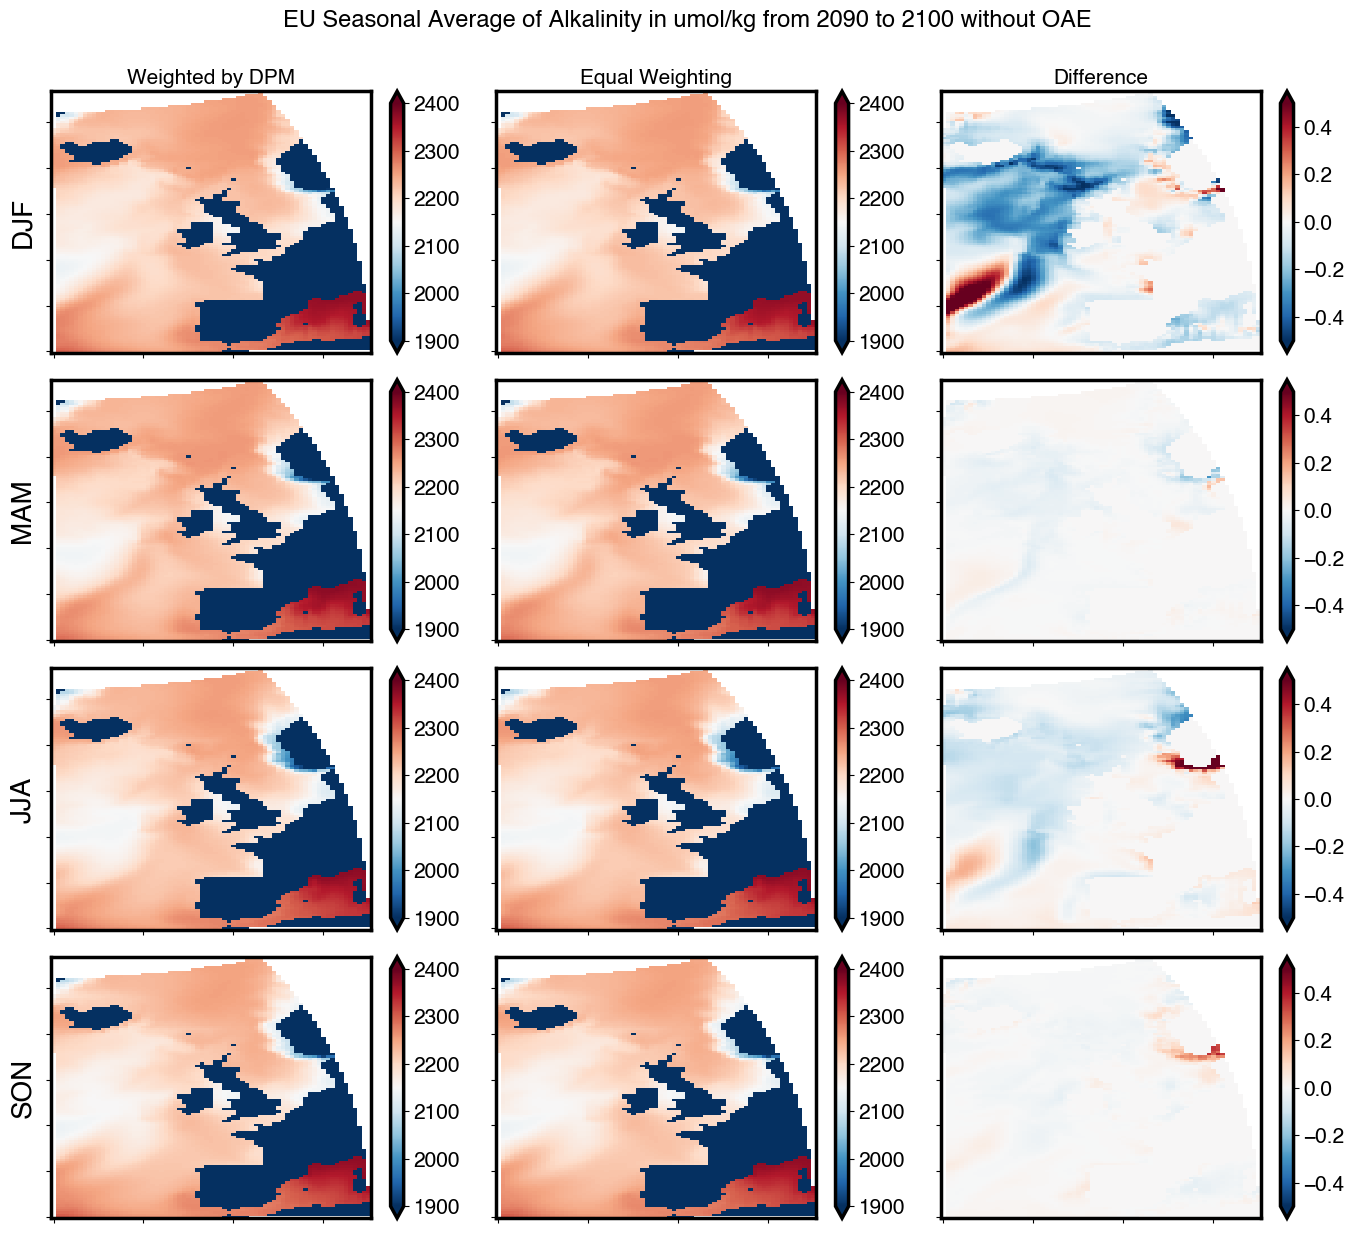

In [38]:
notnull = pd.notnull(ds_unweighted_baseline["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1900,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1900,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity in umol/kg from 2090 to 2100 without OAE", fontname="Helvetica", fontsize=17, y=1.03)

In [39]:
sliced_frame_oae = sliced_frame_oae.ALK.mean(dim=('deptht'))

In [40]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [41]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [42]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='ALK')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='ALK')
ds_diff_oae = ds_diff_oae.to_dataset(name='ALK')

Text(0.5, 1.03, 'EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE')

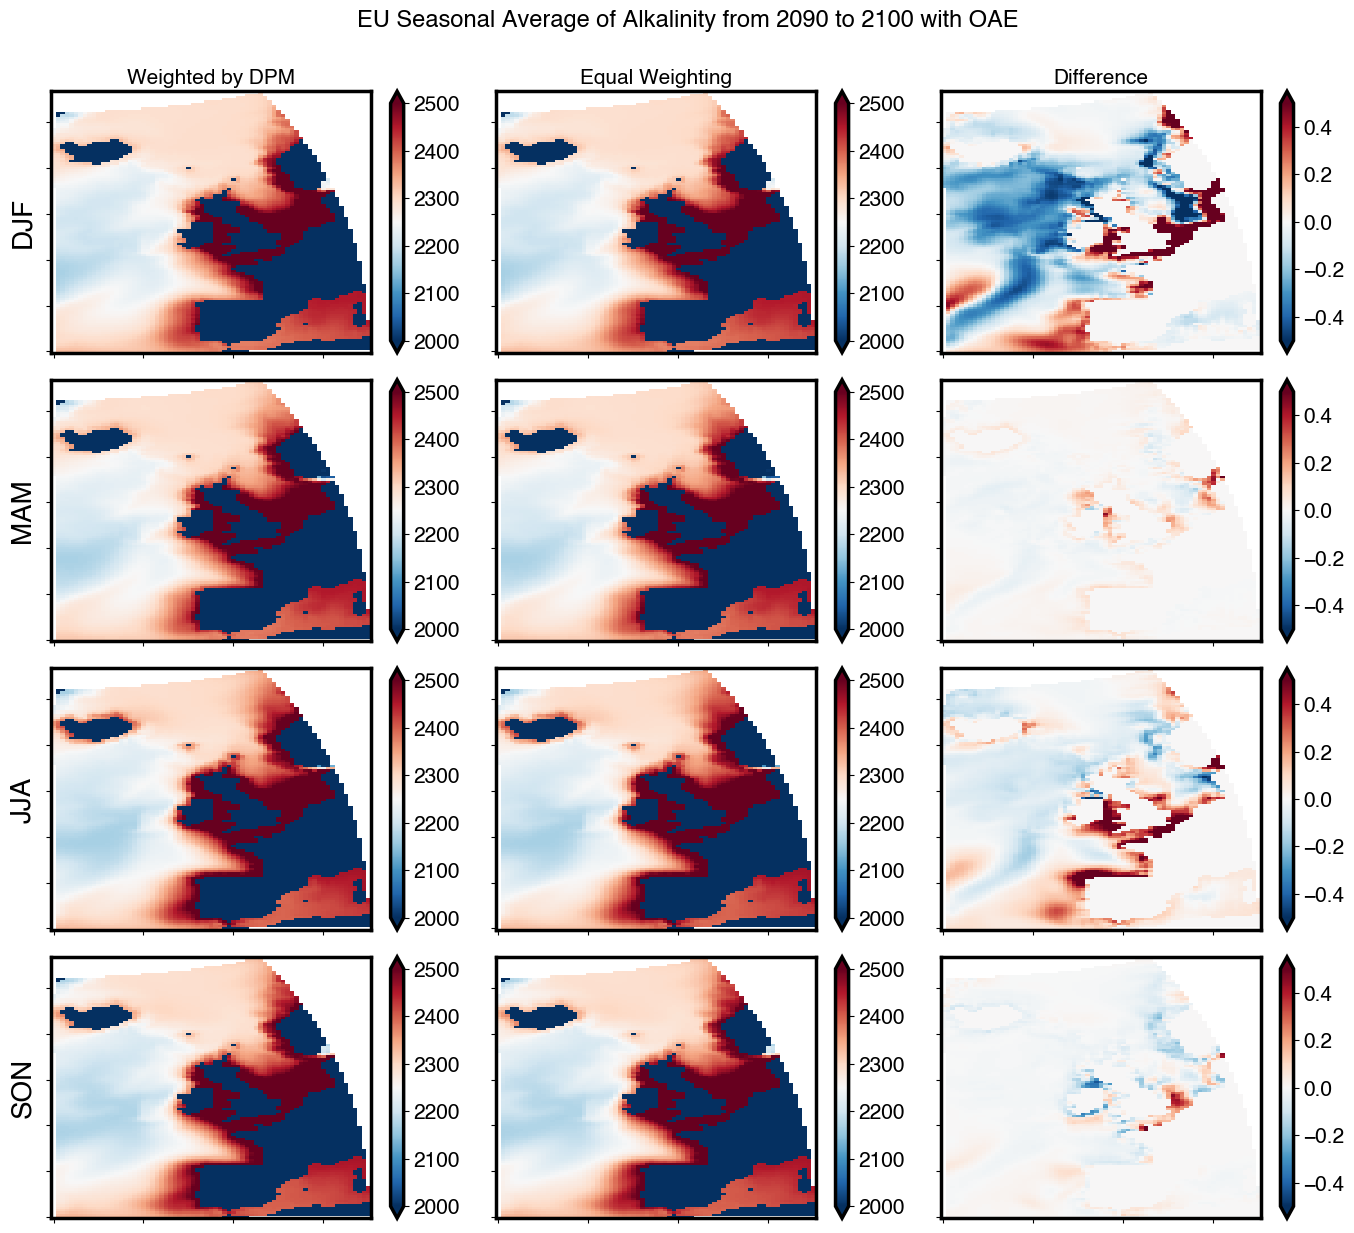

In [95]:
notnull = pd.notnull(ds_unweighted_oae["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontname="Helvetica", fontsize=17, y=1.03)

In [8]:
start_date_ampl = "2016-01-01"
end_date_ampl = "2100-01-01"

alk_oae_ampl = sliced_data_oae["ALK"].sel(time_counter=slice(start_date_ampl, end_date_ampl))

In [9]:
alk_season_summary_oae_ampl = alk_oae_ampl.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_oae_ampl = alk_oae_ampl.resample(time_counter='QS-DEC', keep_attrs=True).mean()
alk_seasonal_mean_oae_ampl = alk_season_mean_all_years_oae_ampl.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [10]:
alk_seasonal_mean_oae_ampl

<xarray.DataArray 'ALK' (time_counter: 337, deptht: 1)>
array([[1677.06970175],
       [1676.91570102],
       [1670.94632236],
       [1671.85679423],
       [1682.19885315],
       [1684.65821063],
       [1676.06853228],
       [1674.36664425],
       [1678.96220302],
       [1679.39936328],
       [1673.41544423],
       [1673.95476925],
       [1681.5061015 ],
       [1685.3452262 ],
       [1680.17452729],
       [1679.52819613],
       [1683.91328355],
       [1682.99806099],
       [1674.654065  ],
       [1676.03168766],
...
       [1772.22693249],
       [1778.30154744],
       [1770.06101028],
       [1765.19701248],
       [1766.2006855 ],
       [1776.03028906],
       [1773.06504749],
       [1773.6587465 ],
       [1777.35769226],
       [1785.26341551],
       [1780.89681202],
       [1776.41370248],
       [1777.44826031],
       [1785.6938937 ],
       [1776.57387334],
       [1769.41700806],
       [1769.8846781 ],
       [1777.17157377],
       [1771.71423331],
       [1766.85435356]])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2015-12-01 ... 2099-12-01
  * deptht        (deptht) float32 3.047

In [11]:
alk_oae_ampl = alk_seasonal_mean_oae_ampl.to_dataframe('ALK_Flux')
alk_oae_ampl = alk_oae_ampl.droplevel(1, axis=0)
alk_oae_ampl['Month'] = pd.DatetimeIndex(alk_oae_ampl.index).month

In [12]:
alk_oae_ampl

,ALK_Flux,Month
time_counter,,
2015-12-01,1677.069702,12
2016-03-01,1676.915701,3
2016-06-01,1670.946322,6
2016-09-01,1671.856794,9
2016-12-01,1682.198853,12
...,...,...
2098-12-01,1769.417008,12
2099-03-01,1769.884678,3
2099-06-01,1777.171574,6


In [14]:
conditions = [
    (alk_oae_ampl['Month'] == 3),
    (alk_oae_ampl['Month'] == 6),
    (alk_oae_ampl['Month'] == 9),
    (alk_oae_ampl['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_oae_ampl['Month'] = np.select(conditions, values)

In [15]:
alk_oae_ampl

,ALK_Flux,Month
time_counter,,
2015-12-01,1677.069702,Winter
2016-03-01,1676.915701,Spring
2016-06-01,1670.946322,Summer
2016-09-01,1671.856794,Fall
2016-12-01,1682.198853,Winter
...,...,...
2098-12-01,1769.417008,Winter
2099-03-01,1769.884678,Spring
2099-06-01,1777.171574,Summer
